# Regularização de modelos
## Comparação de rede neural com e sem regularização
### Introdução

Hoje vamos mergulhar no mundo das redes neurais, com um foco especial em um aspecto crítico do seu design: as técnicas de regularização. Nosso objetivo é entender como essas técnicas podem nos ajudar a construir modelos mais robustos, que generalizam melhor para dados não vistos.

Vamos começar?


### Discussão sobre overfitting e regularização

Antes de discutir sobre a regularização, é crucial entender o problema que ela aborda, o overfitting.
O overfitting ocorre quando nosso modelo aprende o ruído e os detalhes nos dados de treinamento a ponto de se sair mal em novos dados. É essencialmente como decorar as respostas, sem entender as perguntas.

As técnicas de regularização são métodos usados para reduzir o overfitting, melhorando assim o desempenho do modelo em dados não vistos. Hoje vamos focar em duas técnicas populares: regularização L2 e Dropout.

A regularização L2, também conhecida como decaimento de peso, funciona adicionando uma penalidade sobre o tamanho dos coeficientes na função de perda. O termo de penalidade é a soma dos valores ao quadrado dos pesos, multiplicada por um parâmetro de regularização. Isso incentiva o modelo a manter os pesos pequenos, levando a um modelo mais simples.

Dropout é uma abordagem um pouco diferente. Ele descarta aleatoriamente, ou seja, remove temporariamente neurônios na rede durante o treinamento. Isso impede que a rede dependa muito de qualquer característica única, tornando-a mais robusta e menos propensa ao overfitting.

### Preparação dos dados e do modelo

Vamos mudar para o nosso ambiente de codificação e começar a construir os modelos. Usaremos o dataset Fashion MNIST, uma coleção de 70.000 imagens em escala de cinza, de dez categorias de moda, já está inclusa na biblioteca do TensorFlow que estamos utilizando. Nossa tarefa é classificar essas imagens em suas respectivas categorias.

Primeiramente, importamos as bibliotecas necessárias


In [2]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout, Input
from keras.regularizers import l2
import numpy as np
import random

seed_value = 42

tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

Depois carregamos a base de dados

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

E normalizamos as imagens

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Primeiramente, construiremos nosso modelo com regularização L2 e Dropout. Repare como adicionamos o parâmetro kernel_regularizer a nossas camadas densas, e uma camada de Dropout depois dela.

In [5]:
model_with_reg = tf.keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10)
])

Criaremos a seguir um modelo sem qualquer regularização.  Usaremos uma rede neural simples, com três camadas ocultas.

In [6]:
model_without_reg = tf.keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10)
])


Com ambos os modelos definidos, vamos treiná-los em nosso dataset e comparar o desempenho. Para deixar o modelo suscetível a overfitting, colocaremos aqui o conjunto de treinamento, como 20% das imagens e 80% de validação.

O treinamento é dado a partir da compilação dos modelos. E, depois, com o fit


In [7]:
model_with_reg.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history1 = model_with_reg.fit(train_images, train_labels, epochs=100, validation_split=0.8)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5981 - loss: 1.5022 - val_accuracy: 0.8064 - val_loss: 0.8228
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7952 - loss: 0.8600 - val_accuracy: 0.8103 - val_loss: 0.7652
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8146 - loss: 0.7629 - val_accuracy: 0.8345 - val_loss: 0.6843
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8259 - loss: 0.6895 - val_accuracy: 0.8335 - val_loss: 0.6568
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8358 - loss: 0.6529 - val_accuracy: 0.8220 - val_loss: 0.6740
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8396 - loss: 0.6248 - val_accuracy: 0.8375 - val_loss: 0.6168
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8456 - loss: 0.5981 - val_accuracy: 0.8393 - val_loss: 0.6068
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8514 - loss: 0.5819 - val_acc

In [ ]:
model_without_reg.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history2 = model_without_reg.fit(train_images, train_labels, epochs=100, validation_split=0.8)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6615 - loss: 0.9388 - val_accuracy: 0.7820 - val_loss: 0.5835
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8182 - loss: 0.5015 - val_accuracy: 0.8187 - val_loss: 0.4949
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8408 - loss: 0.4235 - val_accuracy: 0.8321 - val_loss: 0.4662
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8546 - loss: 0.3843 - val_accuracy: 0.8460 - val_loss: 0.4294
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8737 - loss: 0.3422 - val_accuracy: 0.8403 - val_loss: 0.4437
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8804 - loss: 0.3212 - val_accuracy: 0.8427 - val_loss: 0.4534
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8895 - loss: 0.3017 - val_accuracy: 0.8403 - val_loss: 0.4653
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8961 - loss: 0.2782 - val_acc

### Comparação

Para comparar, vamos colocar a evolução da função de custo e da acurácia em um gráfico.

Os gráficos mostram que o modelo sem regularização tem uma acurácia de treinamento muito alta, quando comparado à de validação. Além disso, há um decréscimo e, depois, um aumento do custo.

Eles são interpretados comparando-os às linhas azuis e laranjas em cada um. O treinamento para cada caso é azul, e a validação para cada caso é laranja.

Para os de modelo regularizado, tanto de acurácia quanto de custo, as linhas azul e laranja seguem uma mesma direção geral – de crescimento ou decrescimento. Como esperado, o modelo é melhor nos dados de treino, mas, no caso da acurácia, diferencia apenas 0.03 ao final. E o custo age da mesma forma, com diferença de 0.18.

Já para o caso do modelo não regularizado, há outro padrão das linhas. A partir da época 10, a acurácia de treino cresce muito mais rapidamente, o que pode ser observado pela inclinação da linha azul. Já a acurácia de validação se mantém mais constante. Ao final, a diferença entre os dois foi de 0.15, o que é muito maior que para o modelo regularizado, apresentando sinal de overfitting.

No gráfico de custo, a partir da época 10, o custo do treino continua diminuindo, mas o custo da base de validação cresce a cada época, registrando uma diferença entre os dois, no final, de mais de 1, que aumenta muito, comparando-se ao modelo regularizado, o que também é um grande sinal de que ele não está generalizando corretamente, e simplesmente decorando o treino.


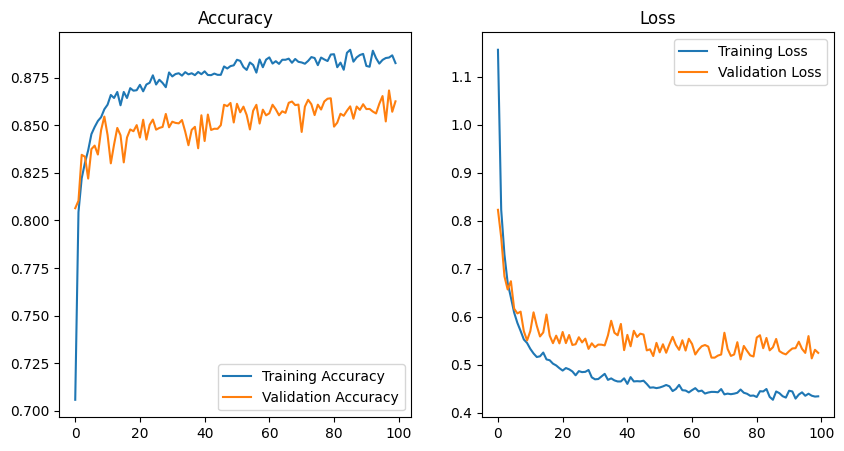

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

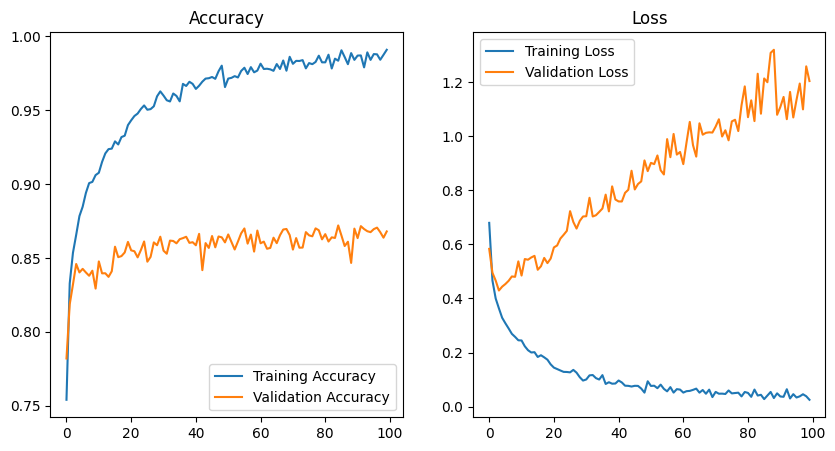

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Podemos fazer a avaliação dos modelos com os dados de teste.

Observamos que eles têm acurácias similares, sendo 85.6% para o modelo não regularizado e 85.0% para o modelo regularizado. O resultado da função de custo para o teste com a regularização é, entretanto, muito mais baixa, sendo de 1.36 para o modelo não regularizado e 0.56 para o modelo regularizado, indicando que ele está mais certo das respostas que está dando nesse modelo, com a regularização (apesar do acerto).

Essas técnicas, em geral, valem melhor para conjuntos de dados com mais variação do que o fashion mnist e, também, para modelos muito mais complexos. Mesmo assim conseguimos observar as vantagens dessas técnicas nesse exemplo prático.


In [ ]:
test_loss, test_acc = model_with_reg.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy with regularization:', test_acc)

test_loss, test_acc = model_without_reg.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy without regularization:', test_acc)



313/313 - 1s - 3ms/step - accuracy: 0.8503 - loss: 0.5589

Test accuracy with regularization: 0.8503000140190125
313/313 - 1s - 2ms/step - accuracy: 0.8563 - loss: 1.3571

Test accuracy without regularization: 0.8562999963760376


### Considerações finais

Em conclusão, técnicas de regularização como a L2 e o Dropout são ferramentas essenciais em seu arsenal de aprendizado de máquina. Elas podem ajudar você a construir modelos que não apenas se saem bem nos seus dados de treinamento, mas também generalizam efetivamente para novos dados não vistos. Sempre considere essas técnicas ao projetar suas redes neurais.